# Will be exploring data regarding Entry into the labor market after vocational education. Graduates of 2021.
### URL = https://www.scb.se/hitta-statistik/statistik-efter-amne/utbildning-samt-forskning-inom-hogskolan/befolkningens-utbildning-och-studiedeltagande/intradet-pa-arbetsmarknaden/

### 1. EDA regarding employment before and after examination. grouped by educational area

In [23]:
import pandas as pd
data_path = "../data/inträde_arbetsmarknaden_2021/intradet-pa-arbetsmarknaden.-examinerade-fran-yrkeshogskolan-2021.xlsx"
df_after = pd.read_excel(data_path, 
                         sheet_name= "2", 
                         skiprows=6,
                         usecols=range(7))

df_after = df_after.dropna(how='all').set_index("Unnamed: 0")
utbildningsomrade = df_after.index[17:32]
utbildningsomrade


Index(['Data/It', 'Ekonomi, administration och försäljning',
       'Friskvård och kroppsvård', 'Hotell, restaurang och turism',
       'Hälso- och sjukvård samt socialt arbete',
       'Journalistik och information', 'Juridik', 'Kultur, media och design',
       'Lantbruk, djurvård, trädgård, skog och fiske',
       'Pedagogik och undervisning', 'Samhällsbyggnad och byggteknik',
       'Säkerhetstjänster', 'Teknik och tillverkning', 'Transporttjänster',
       'Övrigt'],
      dtype='object', name='Unnamed: 0')

In [24]:
df_after.describe()

,Antal,Anställd,Egen företagare/ anställd i eget AB,Arbetssökande/ arbetsmarknads-politisk åtgärd*,Studerande,Annat
count,61,61,61,61,61,61
unique,41,26,17,21,16,7
top,,,,,,
freq,21,21,21,21,21,21


In [25]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Totalt to *  även studieinriktade åtgärder
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Antal                                           61 non-null     object
 1   Anställd                                        61 non-null     object
 2   Egen företagare/ anställd i eget AB             61 non-null     object
 3   Arbetssökande/ arbetsmarknads-politisk åtgärd*  61 non-null     object
 4   Studerande                                      61 non-null     object
 5   Annat                                           61 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [26]:
df_after.columns

Index(['Antal', 'Anställd', 'Egen företagare/ anställd i eget AB',
       'Arbetssökande/ arbetsmarknads-politisk åtgärd*', 'Studerande',
       'Annat'],
      dtype='object')

In [27]:
df_before = pd.read_excel(data_path, 
                         sheet_name= "1", 
                         skiprows=6,
                         usecols=range(7))

df_before = df_before.dropna(how='all').set_index("Unnamed: 0")
df_before

,Antal,Anställd,Egen företagare/ anställd i eget AB,Arbetssökande/ arbetsmarknads-politisk åtgärd*,Studerande,Annat
Unnamed: 0,,,,,,
Totalt,19487,72 ± 1,4 ± 0,9 ± 0,11 ± 1,4 ± 0
NaN,,,,,,
Kön,,,,,,
Kvinnor,11289,75 ± 1,3 ± 0,8 ± 1,10 ± 1,5 ± 0
Män,8198,69 ± 1,5 ± 1,10 ± 1,13 ± 1,3 ± 1
...,...,...,...,...,...,...
Eftergymnasial utbildning kortare än 3 år,4256,66 ± 2,4 ± 1,10 ± 1,15 ± 1,5 ± 1
Eftergymnasial utbildning 3 år eller längre,2571,62 ± 2,6 ± 1,14 ± 1,13 ± 1,5 ± 1
NaN,,,,,,


In [28]:
total = df_after.loc["Totalt", "Antal"]
total

19487

In [35]:
utbildningsomrade = df_after.index[17:32]
df_after_clean = df_after.loc[utbildningsomrade]

utbildningsomrade_before = df_before.index[17:32]
df_before_clean = df_before.loc[utbildningsomrade_before]

df_after_clean

,Antal,Anställd,Egen företagare/ anställd i eget AB,Arbetssökande/ arbetsmarknads-politisk åtgärd*,Studerande,Annat
Unnamed: 0,,,,,,
Data/It,2223,88 ± 2,1 ± 1,6 ± 1,3 ± 1,1 ± 0
"Ekonomi, administration och försäljning",5307,91 ± 1,2 ± 1,3 ± 1,2 ± 0,1 ± 0
Friskvård och kroppsvård,125,..,..,..,..,..
"Hotell, restaurang och turism",888,78 ± 4,5 ± 2,8 ± 3,6 ± 2,3 ± 1
Hälso- och sjukvård samt socialt arbete,2976,91 ± 1,2 ± 1,2 ± 1,3 ± 1,2 ± 1
Journalistik och information,299,76 ± 6,5 ± 3,11 ± 4,7 ± 4,..
Juridik,156,90 ± 7,..,..,6 ± 5,..
"Kultur, media och design",983,75 ± 4,9 ± 2,7 ± 2,6 ± 2,2 ± 1
"Lantbruk, djurvård, trädgård, skog och fiske",448,68 ± 5,26 ± 5,1 ± 1,3 ± 2,2 ± 1


In [39]:
import plotly.graph_objects as go

anstallda_before = df_before_clean['Anställd'].replace('..', '0').str.split('±').str[0].astype(float)
anstallda_after = df_after_clean['Anställd'].replace('..', '0').str.split('±').str[0].astype(float) 

utbildningsomrade = df_after_clean.index
fig = go.Figure(data=[ 
    go.Bar(name='Före utbildning', x=utbildningsomrade, y=anstallda_before, marker_color='lightblue'), 
    go.Bar(name='Efter utbildning', x=utbildningsomrade, y=anstallda_after, marker_color='darkblue')
])

fig.update_layout(
    title='Andel anställda före och efter YH-utbildning per utbildningsområde', 
    xaxis_title='Utbildningsområde',
    yaxis_title='Andel anställda (%)', 
    barmode='group',
    xaxis_tickangle=-45,
    height=600
)

fig.show()
fig.write_html("anställning_fore_efter_olika_utb.html")


In [ ]:
df_diff = pd.DataFrame({
    'Utbildningsområde': df_after_clean.index,
    'Anställda före': anstallda_before,
    'Anställda efter': anstallda_after
})

df_diff['Skillnad'] = df_diff['Anställda efter'] - df_diff['Anställda före']

df_diff_sorted = df_diff.sort_values(by='Skillnad', ascending=False) 
top_5 = df_diff_sorted.head(5)

top_5

,Utbildningsområde,Anställda före,Anställda efter,Skillnad
Unnamed: 0,,,,
Data/It,Data/It,61.0,88.0,27.0
"Kultur, media och design","Kultur, media och design",50.0,75.0,25.0
Teknik och tillverkning,Teknik och tillverkning,65.0,87.0,22.0
Juridik,Juridik,73.0,90.0,17.0
"Ekonomi, administration och försäljning","Ekonomi, administration och försäljning",76.0,91.0,15.0


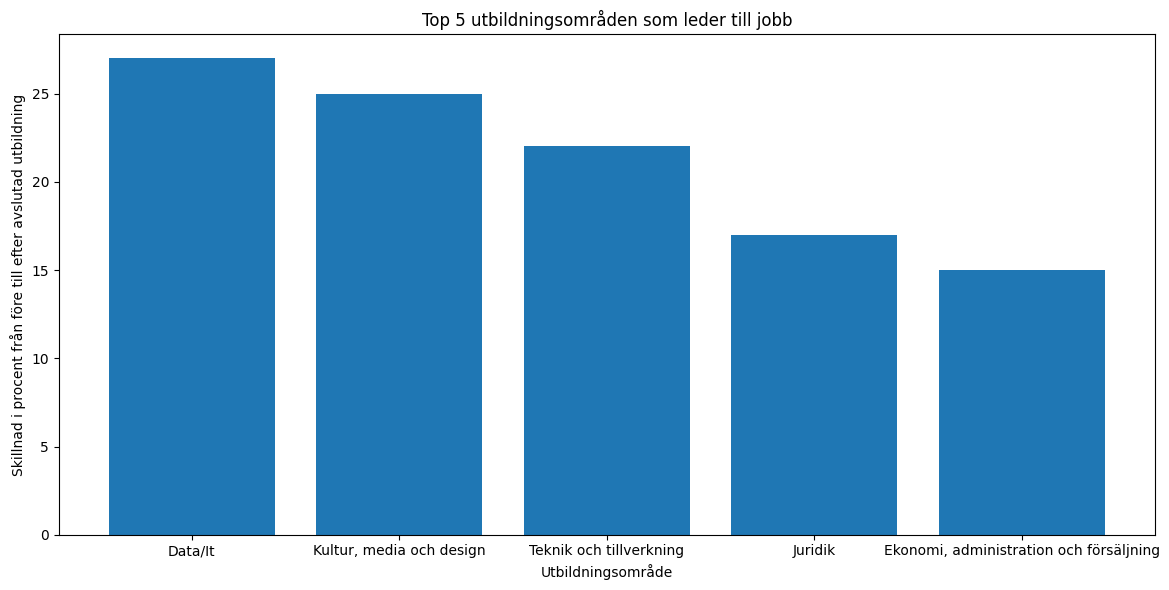

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6)) 

ax.bar( 
    x= top_5["Utbildningsområde"],
    height= top_5["Skillnad"],
    width=0.8
)

ax.set( 
    title= "Top 5 utbildningsområden som leder till jobb", 
    xlabel= "Utbildningsområde", 
    ylabel= "Skillnad i procent från före till efter avslutad utbildning")



fig.tight_layout()
fig.savefig("top5_utbildningar.png")

### 2. EDA regarding satisfaction with education, grouped by educational area

In [61]:
df_satisfaction = pd.read_excel(data_path, 
                         sheet_name= "15", 
                         skiprows=6,
                         usecols=range(6)).set_index("Unnamed: 0").loc[utbildningsomrade]

df_satisfaction

,Antal,Mycket nöjd,Ganska nöjd,Ganska missnöjd,Mycket missnöjd
Unnamed: 0,,,,,
Data/It,2223,43 ± 3,42 ± 3,10 ± 2,5 ± 1
"Ekonomi, administration och försäljning",5307,50 ± 2,41 ± 2,7 ± 1,2 ± 0
Friskvård och kroppsvård,125,..,..,..,..
"Hotell, restaurang och turism",888,43 ± 5,44 ± 5,9 ± 3,2 ± 1
Hälso- och sjukvård samt socialt arbete,2976,60 ± 2,34 ± 2,4 ± 1,1 ± 1
Journalistik och information,299,35 ± 6,51 ± 7,13 ± 5,..
Juridik,156,33 ± 10,52 ± 11,10 ± 7,6 ± 5
"Kultur, media och design",983,49 ± 4,38 ± 4,8 ± 2,5 ± 2
"Lantbruk, djurvård, trädgård, skog och fiske",448,43 ± 5,46 ± 6,7 ± 3,4 ± 2


In [62]:
for col in df_satisfaction.columns[1:]:
    df_satisfaction[col] = df_satisfaction[col].replace('..', '0').str.split('±').str[0].astype(float)

df_satisfaction

,Antal,Mycket nöjd,Ganska nöjd,Ganska missnöjd,Mycket missnöjd
Unnamed: 0,,,,,
Data/It,2223,43.0,42.0,10.0,5.0
"Ekonomi, administration och försäljning",5307,50.0,41.0,7.0,2.0
Friskvård och kroppsvård,125,0.0,0.0,0.0,0.0
"Hotell, restaurang och turism",888,43.0,44.0,9.0,2.0
Hälso- och sjukvård samt socialt arbete,2976,60.0,34.0,4.0,1.0
Journalistik och information,299,35.0,51.0,13.0,0.0
Juridik,156,33.0,52.0,10.0,6.0
"Kultur, media och design",983,49.0,38.0,8.0,5.0
"Lantbruk, djurvård, trädgård, skog och fiske",448,43.0,46.0,7.0,4.0


In [67]:
import plotly.graph_objects as go
df_sorted = df_satisfaction.sort_values(by='Mycket nöjd', ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Mycket nöjd',
    y=df_sorted.index,
    x=df_sorted['Mycket nöjd'],
    orientation='h',
    marker_color='#2ecc71'
))

fig.add_trace(go.Bar(
    name='Ganska nöjd',
    y=df_sorted.index,
    x=df_sorted['Ganska nöjd'],
    orientation='h',
    marker_color='#3498db'
))

fig.add_trace(go.Bar(
    name='Ganska missnöjd',
    y=df_sorted.index,
    x=df_sorted['Ganska missnöjd'],
    orientation='h',
    marker_color='#e74c3c'
))

fig.add_trace(go.Bar(
    name='Mycket missnöjd',
    y=df_sorted.index,
    x=df_sorted['Mycket missnöjd'],
    orientation='h',
    marker_color='#c0392b'
))

fig.update_layout(
    title='Nöjdhet med YH-utbildning per utbildningsområde (sorterat efter "Mycket nöjd")',
    yaxis_title='Utbildningsområde',
    xaxis_title='Andel (%)',
    barmode='stack',
    height=800,
    showlegend=True,
    margin=dict(t=100, b=100, l=200)
)
fig.write_html("Nöjdhet_grad_per_utb.html")
fig.show()

### 3. EDA regarding employment relevancy to their education after examination

In [ ]:
df_relevancy = pd.read_excel(data_path, 
                         sheet_name= "6", 
                         skiprows=6,
                         usecols=range(5)).set_index("Unnamed: 0").loc[utbildningsomrade]

df_relevancy

In [ ]:
for col in df_relevancy.columns[1:]:
    df_relevancy[col] = df_relevancy[col].replace('..', '0').str.split('±').str[0].astype(float)

df_relevancy

In [79]:
columns = df_relevancy.columns.tolist()
df_relevancy_sorted = df_relevancy.sort_values(by=columns[1], ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    name=columns[1],
    y=df_relevancy_sorted.index,
    x=df_relevancy_sorted[columns[1]],
    orientation='h',
    marker_color='#2ecc71'
))

fig.add_trace(go.Bar(
    name=columns[2],
    y=df_relevancy_sorted.index,
    x=df_relevancy_sorted[columns[2]],
    orientation='h',
    marker_color='#3498db'
))

fig.add_trace(go.Bar(
    name= columns[3],
    y=df_relevancy_sorted.index,
    x=df_relevancy_sorted[columns[3]],
    orientation='h',
    marker_color='#e74c3c'
))

fig.update_layout(
    title='Färdig utbildade elevers upplevda relevans för sitt nya arbete gentemot deras avklarade utbildning',
    yaxis_title='Utbildningsområde',
    xaxis_title='Andel (%)',
    barmode='stack',
    height=800,
    showlegend=True,
    margin=dict(t=100, b=100, l=200)
)
fig.write_html("jobb_utb_relevans.html")
fig.show()

### EDA on new dataset (test)

In [ ]:
df_test = pd.read_csv